## <span style='background:yellow; color:red'> Remember:</span>

+ Navigate to your `fmad2223` folder in the console  
+ Execute `git pull origin main` to update the code
+ **Do not modify the files in that folder**, copy them elsewhere

# Working with Data Files.

## Basic Data Files (txt, csv) with pandas.

+ We will begin by downloading one of these files, called `movies.csv` containing information about the top watched films (in theaters) between 2007 and 2011. 

+ We strongly recommend that you always create a project specific `data` folder and store all the downloaded data files for each project in there. In our case you can keep this folder as a subfolder of the *Course Folder*. In particular, do not place the files inside the *Common Repository folder* (the one named *fmad2223*). Use the following link to download the data file (it is advised to use the right button of your mouse and choose an option such as "download the linked file as..."):  
    [movies.csv](https://gist.githubusercontent.com/tiangechen/b68782efa49a16edaf07dc2cdaa855ea/raw/0c794a9717f18b094eabab2cd6a6b9a226903577/movies.csv)

+ Before proceeding to read the file with Python **you should always begin examining the contents of a data file with a text editor** (such as Notepad++ in Windows or BBedit in Mac). Not doing so will often result in bad data processing downstream. And please refrain from using spreadsheets (such as Excel) for this exploratory tasks. Not only will it fail too often, in some cases it can lead to data loss.  

+ In this case opening the file in a text editor (BBedit in the Mac here) shows something like this (only the first few lines are shown):
![](fig/010-movies_csv_open_text_editor.png)
There are some key ingredients of such files that you need to pay attention to here, even in simple cases like this first example:
    + Each line of the file corresponds to a row of the data table. 
    + The first line or *header* is often a special line, containing the names of the table columns. In the best case scenario these correspond to the variables in our data.
    + The individual column values in every line are separated by a fixed symbol: a comma, a semicolon, a space or tab, etc. This will be called the *separator* and it is critical to determine which one was used in each data file. For movies.csv the separator is a comma.
    
+ Now that we have some information about the file we are ready to load it into a pandas Dataframe, that we will also call `movies`. Note that we first need to import pandas. 

In [1]:
import pandas as pd

movies = pd.read_csv('data/movies.csv', sep=",", header=0)

print(movies.head())

                                 Film   Genre            Lead Studio  \
0                     Youth in Revolt  Comedy  The Weinstein Company   
1  You Will Meet a Tall Dark Stranger  Comedy            Independent   
2                        When in Rome  Comedy                 Disney   
3               What Happens in Vegas  Comedy                    Fox   
4                 Water For Elephants   Drama       20th Century Fox   

   Audience score %  Profitability  Rotten Tomatoes % Worldwide Gross  Year  
0                52       1.090000                 68         $19.62   2010  
1                35       1.211818                 43         $26.66   2010  
2                44       0.000000                 15         $43.04   2010  
3                72       6.267647                 28        $219.37   2008  
4                72       3.081421                 60        $117.09   2011  


+ The arguments `sep` and `header` provide the pandas [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function with the information we discovered in our initial file exploration. If you run the function like this:

    ```python
    movies = pd.read_csv('data/movies.csv')
    ```
    pandas will try to *guess* which separator to use and whether or not there is a header line. This `movies.csv` file is such an easy example that the code will work either way. But be warned: this will sometimes fail and when working with many large files the guessing adds an unnecessary overhead to the process. 

**Exercise:** 

+ using the commands we saw in `01a_test_your_setup` find out the shape (rows, columns) of this DataFrame.
+ use the bracket selection (with `loc` or `iloc`) to get the `Genre` information for the movies from year 2010. What type of object did you obtain?

In [2]:
movies.loc[movies.Year == 2010, 'Genre']

0        Comedy
1        Comedy
2        Comedy
8        Comedy
20       Comedy
21    Animation
23       Comedy
24       Comedy
25       Comedy
27        Drama
32       Comedy
48       Comedy
49       Comedy
51       Comedy
52       Comedy
54       Action
55       Comedy
58       Comedy
62       Comedy
70        Drama
Name: Genre, dtype: object

### Reading the csv file from a URL (link)

+ Sometimes it is simpler to skip the download part of the process and read the data directly from a link. Keep in mind, however, that for this to work the same caveats as before apply: it is better to explicitly set the separator, to know beforehand if there is a header in the file, etc.

+ Let us see a classic example: the `mpg` data set can be downloaded [in csv format with this link](https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/mpg.csv). This data set contains information about fuel consumption (miles per gallon, thus mpg) and other characteristics of some car models from 1999 to 2008. You can read more aboout it and the variables it contains [in this link](https://ggplot2.tidyverse.org/reference/mpg.html).

+ We use this example to show that we can use the link to the csv file as argument for pandas `read_csv`:

In [3]:
mpg_link = "https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/mpg.csv"
mpg = pd.read_csv(mpg_link)

print(mpg.head())

  manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact


### Creating and saving a csv file

+ Next let us begin by creating a pandas DataFrame with synthetic data. Learning to create such objects is an essential part of the data analysis skills required in this course. You will often need to simulate data with prescribed stratistical properties in order to perform computer experiments. These are in turn the key to understand the expected behavior in many real world problems. 

+ The NumPy and Scipy modules offer many tools for statistical modeling, and we will be meeting many of these tools in the next sessions. Here we begin with a simple example in which we use NumPy. You can [use this link](https://numpy.org/doc/1.16/reference/routines.random.html) to read the documentation for the functions we use and to get a first idea of the possibilities. For the time being it is ok if you don't fully understand some of the words below. We will discuss these issues later in the course:
    + The `np.random.randint` function to generate 100 random integers between 1 and 20 (both included, of course with replacement). These become the pandas Series `A`. Recall that each column of a Data.Frame is a Series.
    + The `str.ascii_lowercase` string contains all the English alphabet lower case letters. We use a list comprehension to convert that to a NumPy array and then use `np.random.choice` to select 100 random letters with replacement. These form the Series `B`.
    + Finally we use `np.random.random_sample` to obtain 100 random floating values uniformly distributed in the $[-4, 4]$ interval. These form the Series `C`.
    

In [4]:
import numpy as np
np.random.seed(2022)  # seed for reproducibility

# 100 random integers
A = pd.Series(np.random.randint(low = 1, high = 7, size = 100))

# 100 random lowercase letters
import string as str
alphabet_string = str.ascii_lowercase
alphabet = np.array([alphabet_string[i] for i in range(len(alphabet_string))])
B = pd.Series(np.random.choice(alphabet, size=100))

# 100 random floats in [-4, 4]
C = pd.Series(8 * np.random.random_sample(size=100) - 4)


# Use the above as columns for a DataFrame
X = pd.DataFrame({'A':A, 'B':B, 'C':C})
print(X.head(n=10))

   A  B         C
0  6  k  1.612108
1  5  m  2.581690
2  6  z  1.908050
3  1  v  3.903152
4  2  x -2.726556
5  2  y  3.904638
6  1  a  1.810280
7  1  w  0.800752
8  3  y -2.733084
9  1  i -3.413324


+ Now that we have created this DataFrame we can save it to a csv file. To identify it we will name that file `EDA_data_saving.csv` (in the `data` folder). Every pandas DataFrame has a `to_csv` method that we can use for this. Run the following command and then use a text editor (Notepad++, BBEdit or similar) to check that the contents are what you expect. Make sure to check the header line, the separator and the number of lines.

In [5]:
X.to_csv("data/EDA_data_saving.csv", sep=";", index=False)

+ **Exercise:** change the separator to a comma and set `index = True`. Then run the code and check the changes. 

    In general we recommend setting `index=False` unless you have a good reason not to. These makes reading the csv files in other programs easier. Be careful because the default behavior is `index=True`. 


## Excel Files

+ Excel files are frequently used as a data source in some contexts. For simple files, reading their content into a pandas DataFrame is quite straightforward. But for more complex cases things can get more complicated. However, to keep things simple here we will use a simple file containing data about 2010 train accidents in the US. You can download the file (to the data folder) using [right-click in this link](http://users.stat.ufl.edu/~winner/data/train_acc_2010.xls). And the meaning of the variables in this dataset is [clarified by this link](https://users.stat.ufl.edu/~winner/data/train_acc_2010.txt)


+ First we need to install an additional module into the fmad environment. This will often be the case when reading data from other sources. Do you remember how to install new modules?
  **Exercise:** install the module called `xlrd` into the fmad environment.

+ Then run this code to read the data:

In [6]:
xlsx_file = './data/train_acc_2010.xls'

train_accidents = pd.read_excel(xlsx_file)

print(train_accidents.head())

   Acident Railroad  Month  Day State      County TrkType TrkMnt AccType  \
0        1      NS       1    1   KY      KENTON    Main     NS     Der    
1        2     ATK       1    2   CA     ALAMEDA    Yard    ATK     Oth    
2        3    BNSF       1    2   MT      DAWSON    Yard   BNSF     Der    
3        4    BNSF       1    2   OK       TULSA    Yard   BNSF     Der    
4        5    MNCW       1    2   CT   FAIRFIELD    Main   MNCW     Oth    

  AccCause  EqpDamg  TrkDamg  Killed  Injured           RREquip  Speed  \
0        T     8485   333700       0        0    FREIGHT TRAIN      24   
1        M  1500000        0       0        0  PASSENGER TRAIN       0   
2        H   103833    17615       0        0    FREIGHT TRAIN      10   
3        M    15000    50000       0        0    LIGHT LOCO(S)       4   
4        E     9964      750       0        0  PASSENGER TRAIN      45   

   LocosDer  CarsDer  
0         0       13  
1         0        0  
2         0        6  
3     

+ You can read the [documentation for the `read_excel` function here](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html). The examples therein will show you how to select a particular range of rows and columns in the spreadsheet and how to deal with the case when there are several sheets of data in the Excel file. And if you need to export directly from Python to Excel [read about the `to_excel` method here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html)

# Different Types of Data

+ The data sets we are beginning to see in these examples follow the two most basic rules of what is called *Tidy Data* (a term coined by Hadley Wickham in 2014):
    + Each column of the table corresponds to a *variable*.
    + Each row corresponds to an *observation*, *individual*, *case* or *sample*. All these terms refer to a single observational unit of whatever it is that we are considering.
    
+ The variables can be of different types: integer or floating point numbers, dates, binary variables (yes/no type), text strings, labels, dates, positions, etc. Those different types of variables allow for different operations and need specific treatment in many cases, if we are to get out of them as much information as possible. 

+ In the next sections we will meet the basic types of data (variables) and the best way to describe them. We will be using some of the examples that we have already seen and some others like the ones introduced here:

    + The framingham data set contains health data from a heart disease study that took place in Framingham (UK). [This link contains the csv file URL](https://raw.githubusercontent.com/mbdfmad/fmad2122/main/data/framingham.csv) and you can [read more about the study and the variables in the table here](https://biolincc.nhlbi.nih.gov/media/teachingstudies/FHS_Teaching_Longitudinal_Data_Documentation.pdf?link_time=2019-08-26_14:42:24.487245).
    + The `flights` data set contains information about flights that departed from New York in 2013. [This link contains the csv file URL](https://github.com/byuidatascience/data4python4ds/raw/master/data-raw/flights/flights.csv). You can read more about this data set [in this link](https://rdrr.io/cran/nycflights13/man/flights.html).
    
+ **Exercise:** using the URLs above directly (without downloading) load these data sets into two pandas DataFrames called, respectively, `framingham` and `flights`.   **Warning:** Some of the cells below will not work until you complete these exercise.

In [7]:
# %load "code/EDA_exercise_import_csv.py"

In [8]:
print(framingham.columns)
print(framingham.head())
print(framingham.describe())
print(framingham.shape)

NameError: name 'framingham' is not defined

In [9]:
print(flights.columns)
print(flights.head())
print(flights.describe())
print(flights.shape)

NameError: name 'flights' is not defined

+ Let us pause here to think about the kind of data types in the examples we have seen. Many (but not all) of the variables / columns in the data tables fit into one of these categories:
    + **Quantitative or Numeric Variables**. That means that the values of these variables are *numbers that have been measured in a meaningful scale, such that the operations with this numbers have meaning*. Numeric variables are further divided into **Discrete** and **Continuous** variables. We will discuss this with detail below.
    + **Qualitative Variables or Factors**. The values of these variables are *labels* and they are used to *group the observations into classes*. A typical example would be grouping bird observations into species. The name of a species is a label, but it makes no sense to sum (or take the mean of) an ostrich and a sparrow. Even if the labels are sometimes numeric, operations have no sensible interpretation in relation with the data (we will see however an exception for binary variables when discussing proportions).  

+ A numeric variable is **discrete** if there is a minimal or atomic unit of measurement such that all values of the variable are multiples of that unit. For example, when counting the coins in your wallet it makes no sense to say you have 3.5 coins. You may have 3 or 4, but no "fraction of a coin" counts as a coin.

+ On the other hand a numeric variable is **continuous** if its values are measured in a floating point (decimal) scale, such that given two values then any intermediate values is, in principle, a possible value for the variable. 

+ We will see, however, that the division between discrete and continuous is not always as clear cut as it may appear at first. At the end of the day, it is usually a modeling choice. We will see many examples of why this happens. 

+ **Exercise / Discussion.** Look at the variables in some of the tables from the previous examples. How do they fit this types of variables? Are they quantitative or are they factors? In the case of numeric variables, do you consider them continuous or discrete?

# Discrete (Quantitative) Variables

## Frequency Tables

+ Let us look at the synthetic `X` DataFrame that we created before. The `A` variable is one example of a discrete numeric variable, as it only takes integer values (and few different values; more on this later). The first step in the exploration of a discrete variable is to obtain an **absolute frequency table**. For each value of the variable, this table counts the number of appearances of that value in the table. In pandas you can get it using the `crosstab` function:

In [10]:
AbsFreq_X = X['A'].value_counts()
AbsFreq_X

6    22
1    20
2    17
3    16
5    13
4    12
Name: A, dtype: int64

+ Note that the values in the table are not sorted by the size (they are jsut ordered by their order of appearance in the table). We will often want them ordered, especially in this case case of numeric variables. To get this ordered frequency table use:

In [11]:
AbsFreq_X = X['A'].value_counts().sort_index()
AbsFreq_X

1    20
2    17
3    16
4    12
5    13
6    22
Name: A, dtype: int64

+ Absolute frequencies are often simply called *counts*. Of course the sum of the absolute frequencies equals the numer of rows:

In [12]:
print(sum(AbsFreq_X))

100


+ Absolute frequencies depend on the size of the whole data set. Sometimes, and specially when comparing two data sets, it is better to use *relative frequencies*. These are the answer to questions of like "*What proportion of the values are equal to...?*" In pandas you can easily modify `value_counts` to get the relative frequencies or proportions:

In [13]:
RelFreq_X = X['A'].value_counts(normalize=True).sort_index()
RelFreq_X

1    0.20
2    0.17
3    0.16
4    0.12
5    0.13
6    0.22
Name: A, dtype: float64

In [14]:
print(sum(RelFreq_X))

1.0


### Some comments about relative frequencies

+ Relative frequencies always add up to one. They are closely related to percents, but instead of using 100 as the total, we are using 1. 
+ More importantly, *relative frequencies are deeply connected with the first intuitive ideas about probability*. That is: imagine that you were to pick at random a row of the `X` table. What is the probability that the value of `A` in that row is 4. The relative frequency table tells us that we expect the value 4 to appear in 12 out of every 100 repetitions of that experiment.  

### Cumulative frequencies (absolute and relative)

+ Cumulative frequencies are used to respond to questions like "how many values are lower than ...?" os the analogous question in terms of proportions. We can easily obtain cumulative results using the `cumsum` method. Let us use it to get cumulative frequencies for `X`, both absolute and relative: 

In [15]:
CumAbsFreq_X = AbsFreq_X.cumsum()
CumAbsFreq_X

1     20
2     37
3     53
4     65
5     78
6    100
Name: A, dtype: int64

In [16]:
CumRelFreq_X = RelFreq_X.cumsum()
CumRelFreq_X

1    0.20
2    0.37
3    0.53
4    0.65
5    0.78
6    1.00
Name: A, dtype: float64

+ The final cumulative frequency is always the total number of rows in the data set (in the absolute case) or 1 (in the relative case).

## Plots for discrete variables

+ The basic and recommended graphical representation for a discrete variable is the *bar plot*. We will illustrate this with the `A` variable of `X`:

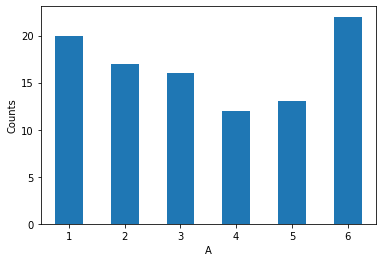

In [17]:
plot = AbsFreq_X.plot.bar(rot=0, xlabel='A', ylabel ='Counts')

    The only difference when plotting the relative frequencies is the scale in the vertical axis.
    
+ The bar plot in this example gives us a visual summary of the *shape* of the data. In other words, we can see how the data is distributed among the different possible values. We will talk a lot about *distributions* in this course, and you can consider this humble bar plot as the first step in that direction.

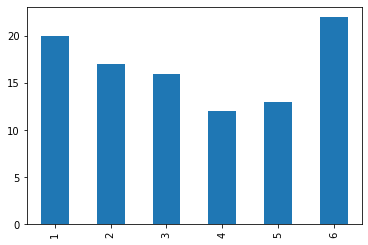

In [18]:
plot = X['A'].value_counts().sort_index().plot.bar()

# Continuous (Quantitative) Variables

+ We will first consider variables that are clearly treated as continuous in the data set. For example, the `C` variable in `X` was designed that way. For such a variable, frequency tables make no sense. Most values of such variables will appear only once in the table, making almost every absolute frequency equal to 1. We need a different set of tools for these variables.

+ The simplest idea is to reduce the continuous variables to discrete ones using `binning`. That is we divide all  values of the variable into *bins*, which are a collection of intervals that span all possible values. In our present example, the variable `C` was designed to take random values in the $[-4, 4]$ interval. Thus we will divide that interval into a collection of subintervals or bins. How many bins? Well, that is not a simple question, because the answer depends on both the specific data and what you are trying to accomplish. A rule of thumb is not to use less than five bins and no more than $\sqrt{n}$, where $n$ is the number of data points for your variable. In our case we will divide $[-4, 4]$ into eight subintervals or bins and we will assign each value of `C` to the corresponding subinterval. We can do that with the pandas cut function. We will first apply it naïvely to the variable and see what happens:

In [19]:
pd.cut(X['C'], 8)

0       (1.012, 2.008]
1       (2.008, 3.004]
2       (1.012, 2.008]
3         (3.004, 4.0]
4     (-2.971, -1.975]
            ...       
95        (3.004, 4.0]
96     (-1.975, -0.98]
97      (1.012, 2.008]
98     (0.0163, 1.012]
99     (-1.975, -0.98]
Name: C, Length: 100, dtype: category
Categories (8, interval[float64, right]): [(-3.975, -2.971] < (-2.971, -1.975] < (-1.975, -0.98] < (-0.98, 0.0163] < (0.0163, 1.012] < (1.012, 2.008] < (2.008, 3.004] < (3.004, 4.0]]

As you can see, the result is a Panda Series that contains the subinterval assigned to the corresponding values in `C`. But the endpoints of these intervals depend too much on the specifics of our data. Remember that these were randomly chosen in the $[-4, 4]$ interval. If we were to choose another sample of random points in the same interval, these endpoints probably wouldn't do. Thus we go back to `cut` but this time we explicitly set the endpoints of the bins (we call them *nodes* here), as a NumPy array. 

In [20]:
C_nodes = np.arange(-4, 5, 1)
print(C_nodes)

pd.cut(X['C'], bins=C_nodes, ordered=True)

[-4 -3 -2 -1  0  1  2  3  4]


0       (1, 2]
1       (2, 3]
2       (1, 2]
3       (3, 4]
4     (-3, -2]
        ...   
95      (3, 4]
96    (-2, -1]
97      (1, 2]
98      (0, 1]
99    (-2, -1]
Name: C, Length: 100, dtype: category
Categories (8, interval[int64, right]): [(-4, -3] < (-3, -2] < (-2, -1] < (-1, 0] < (0, 1] < (1, 2] < (2, 3] < (3, 4]]

That looks much better. Note that we also took the chance to instruct Python to keep the subintervals ordered. In fact, the 'C_binned' variable is now an *ordered factor*, a concept that we will discuss below. We can now add that column to the DataFrame in a very simple way:

In [21]:
X['C_binned'] = pd.cut(X['C'], bins=C_nodes, ordered=True)
print(X.head(10))

   A  B         C  C_binned
0  6  k  1.612108    (1, 2]
1  5  m  2.581690    (2, 3]
2  6  z  1.908050    (1, 2]
3  1  v  3.903152    (3, 4]
4  2  x -2.726556  (-3, -2]
5  2  y  3.904638    (3, 4]
6  1  a  1.810280    (1, 2]
7  1  w  0.800752    (0, 1]
8  3  y -2.733084  (-3, -2]
9  1  i -3.413324  (-4, -3]


This `C_binned` variable is a factor (a qualitative variable), because its values are not numbers, but labels (the names of the subintervals). We will discuss factors below, but for now suffice it to say that we can also use the concept of frequencies with factors. We get this table (again, the order is taken into account):

In [22]:
X['C_binned'].value_counts().sort_index()

(-4, -3]    14
(-3, -2]    14
(-2, -1]    12
(-1, 0]      9
(0, 1]      10
(1, 2]      13
(2, 3]       9
(3, 4]      19
Name: C_binned, dtype: int64

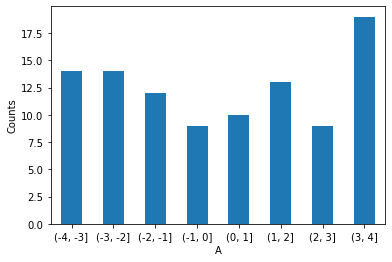

In [23]:
plot = X['C_binned'].value_counts().sort_index().plot.bar(rot=0, xlabel='A', ylabel ='Counts')

## Histograms and Density Plots


The preceding plot is not bad, but it has some issues. The most relevant one is the fact that the *gaps* between the bars have lost utility. The division we made with cut created *consecutive intervals* qith no space between them. And this plot fails to convey that. The alternative is a classic type of plot for continuous data called the histogram. We can get it with pandas method `hist`. Here we have tweaked the result a little to improve the resulting plot:

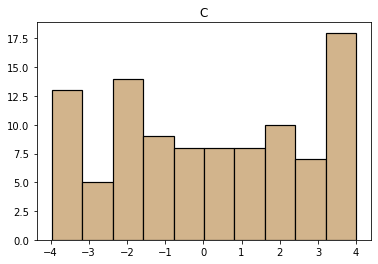

In [24]:
plot = X.hist('C', edgecolor='black', linewidth=1.2, grid=False, color = "tan")

+ But you can notice here that `hist` has chosen the number of bins for us. It is often better to do this by hand. We wil use the `C_nodes` values again:

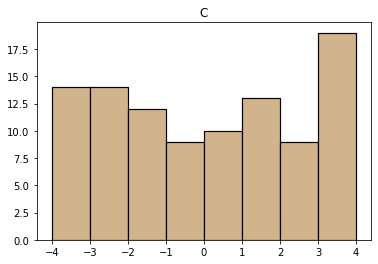

In [25]:
plot = X.hist('C', edgecolor='black', linewidth=1.2, grid=False, color = "tan", bins=C_nodes)

+ Please compare the histogram with the bar plot at the end of the previous section. And remember that instead of an explicit list of nodes, you can just give the number of bins or even let Python choose for you:

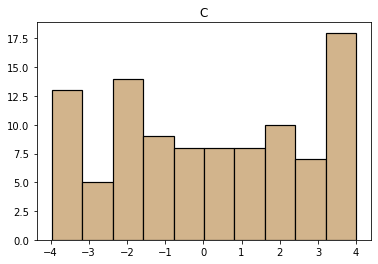

In [26]:
plot = X.hist('C', edgecolor='black', linewidth=1.2, grid=False, color = "tan")

## Discrete - Continuous Transition
+ Frequency tables become soon useless as the number of different values of a variable increases. For example, if we look at the `CarsDer` variable in the `train_accidents` DataFrame (indicates the number of derailed train cars in the accident) and we ask Python for a frequency table, we will get this answer:

In [27]:
train_accidents['CarsDer'].value_counts().sort_index()

0      1131
1       362
2       220
3       190
4       161
5       130
6        97
7        67
8        50
9        34
10       26
11       26
12       17
13       10
14       15
15        6
16       14
17        6
18        6
19        7
20        2
21        3
22        4
23        2
24        4
25        4
26        2
27        3
28        2
29        3
30        1
31        2
32        1
33        1
35        1
38        2
39        1
40        2
41        1
43        1
44        1
50        1
59        1
108       1
Name: CarsDer, dtype: int64

**Exercise:** What is the cumulative relative frequency of 10 in the previous table?


+ This is a common situation and it illustrates the kind of situation where the boundary between discrete and continuous variables becomes a blur. Not only the frequency table is too big to be useful. There is also the fact that the information it provides is, in this format, less and less relevant. Think about this: does it make much of a difference if the number of derailed cars was 27 instead of 26? And that kind of problem gets only worse as the number of different values increases. At some point, the information that becomes relevant is not the particular value, but the interval it belongs to. The questions we care about are *binned questions*, such as: did the accident involve more than 10 but less than 20 cars? This gives us a better picture of the accident's severity, possible cost and damages, etc.

+ The key idea here is that, even when you think that the *nature of the variable is discrete*, it can be 

# Distributions

# Measures of Center and Spread

# Factors